# Library

In [1]:
# Import the necessary packages and modules
import numpy as np
import os
# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet import MobileNet

# Others
import shutil
import random
import pandas as pd

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Load dataset

In [2]:
# All images will be rescaled by 1./255.
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
val_generator = val_datagen.flow_from_directory(
        "Dataset/Test",  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        # Specify the classes explicitly
        classes = ['Negative', 'Positive'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        shuffle=False)

Found 8000 images belonging to 2 classes.


# Load all model

In [3]:
MobileNet_basic=keras.models.load_model('MobileNet_Basic.h5')
MobileNet_Modified1=keras.models.load_model('MobileNet_Modified1.h5')
MobileNet_Modified2=keras.models.load_model('MobileNet_Modified2.h5')
MobileNet_Modified3=keras.models.load_model('MobileNet_Modified3.h5')
MobileNet_Modified4=keras.models.load_model('MobileNet_Modified4.h5')
MobileNet_Modified5=keras.models.load_model('MobileNet_Modified5.h5')

# MobileNet Basic Model Validation

In [4]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNet_Basic = MobileNet_basic.evaluate(val_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNet_Basic[1]*100))
print("Loss: %.6f%%" % (scores_MobileNet_Basic[0]*100))

==========================Evaluate Model====================
250/250 [==============================] - 12s 43ms/step - loss: 0.0111 - accuracy: 0.9979
Accuracy: 99.787498%
Loss: 1.110797%


==========================Confusion Matrix====================
250/250 [==============================] - 11s 44ms/step


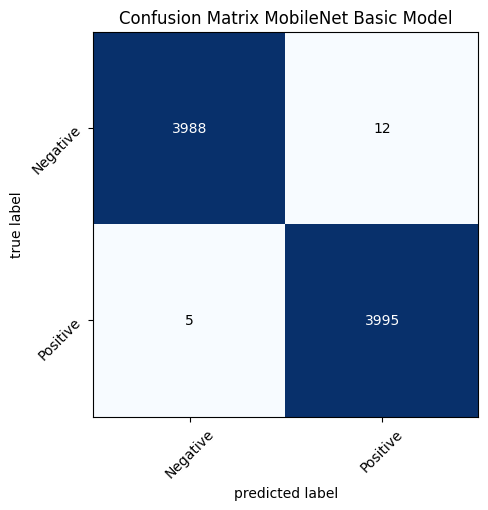

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    Negative     0.9987    0.9970    0.9979      4000
    Positive     0.9970    0.9988    0.9979      4000

    accuracy                         0.9979      8000
   macro avg     0.9979    0.9979    0.9979      8000
weighted avg     0.9979    0.9979    0.9979      8000

==========================F1 Score====================
F1 Score :  0.9978749983730456


In [5]:
# Confusion Matrix and Classification Report
target_names = ['Negative', 'Positive']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNet_basic.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.title('Confusion Matrix MobileNet Basic Model')
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(val_generator.classes, y_pred, target_names=target_names, digits=4))

# F1 Score
print("==========================F1 Score====================")
f1_MobileNet_basic = f1_score(val_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_MobileNet_basic)

# MobileNet Modified (alpha=0.95) Model Validation

In [6]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNet_Modified1 = MobileNet_Modified1.evaluate(val_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNet_Modified1[1]*100))
print("Loss: %.6f%%" % (scores_MobileNet_Modified1[0]*100))

==========================Evaluate Model====================
250/250 [==============================] - 11s 42ms/step - loss: 0.0078 - accuracy: 0.9986
Accuracy: 99.862498%
Loss: 0.775498%


==========================Confusion Matrix====================
250/250 [==============================] - 11s 43ms/step


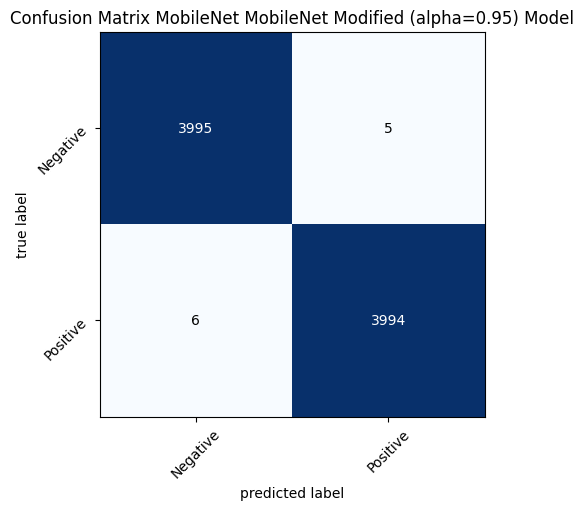

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    Negative     0.9985    0.9988    0.9986      4000
    Positive     0.9987    0.9985    0.9986      4000

    accuracy                         0.9986      8000
   macro avg     0.9986    0.9986    0.9986      8000
weighted avg     0.9986    0.9986    0.9986      8000

==========================F1 Score====================
F1 Score :  0.9986249999785157


In [7]:
# Confusion Matrix and Classification Report
target_names = ['Negative', 'Positive']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNet_Modified1.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.title('Confusion Matrix MobileNet MobileNet Modified (alpha=0.95) Model')
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(val_generator.classes, y_pred, target_names=target_names, digits=4))

# F1 Score
print("==========================F1 Score====================")
f1_MobileNet_Modified1 = f1_score(val_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_MobileNet_Modified1)

# MobileNet Modified (alpha=0.90) Model Validation

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNet_Modified2 = MobileNet_Modified2.evaluate(val_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNet_Modified2[1]*100))
print("Loss: %.6f%%" % (scores_MobileNet_Modified2[0]*100))

==========================Evaluate Model====================
250/250 [==============================] - 12s 44ms/step - loss: 0.0122 - accuracy: 0.9980
Accuracy: 99.800003%
Loss: 1.224172%


==========================Confusion Matrix====================
250/250 [==============================] - 11s 40ms/step


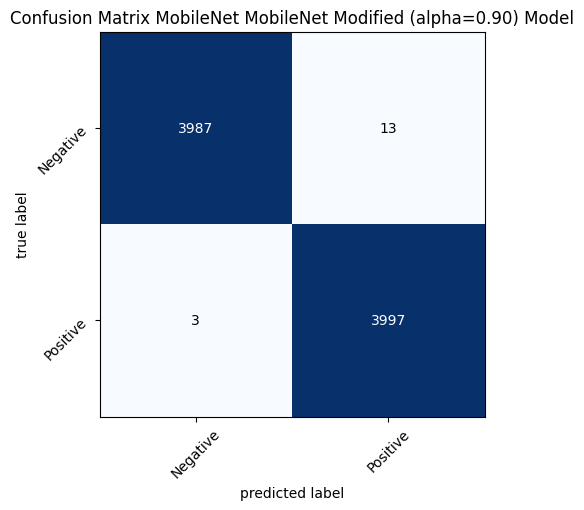

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    Negative     0.9992    0.9968    0.9980      4000
    Positive     0.9968    0.9992    0.9980      4000

    accuracy                         0.9980      8000
   macro avg     0.9980    0.9980    0.9980      8000
weighted avg     0.9980    0.9980    0.9980      8000

==========================F1 Score====================
F1 Score :  0.9979999968749951


In [9]:
# Confusion Matrix and Classification Report
target_names = ['Negative', 'Positive']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNet_Modified2.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.title('Confusion Matrix MobileNet MobileNet Modified (alpha=0.90) Model')
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(val_generator.classes, y_pred, target_names=target_names, digits=4))

# F1 Score
print("==========================F1 Score====================")
f1_MobileNet_Modified2 = f1_score(val_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_MobileNet_Modified2)

# MobileNet Modified (alpha=0.85) Model Validation

In [10]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNet_Modified3 = MobileNet_Modified3.evaluate(val_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNet_Modified3[1]*100))
print("Loss: %.6f%%" % (scores_MobileNet_Modified3[0]*100))

==========================Evaluate Model====================
250/250 [==============================] - 11s 41ms/step - loss: 0.0084 - accuracy: 0.9984
Accuracy: 99.837500%
Loss: 0.835760%


==========================Confusion Matrix====================
250/250 [==============================] - 11s 40ms/step


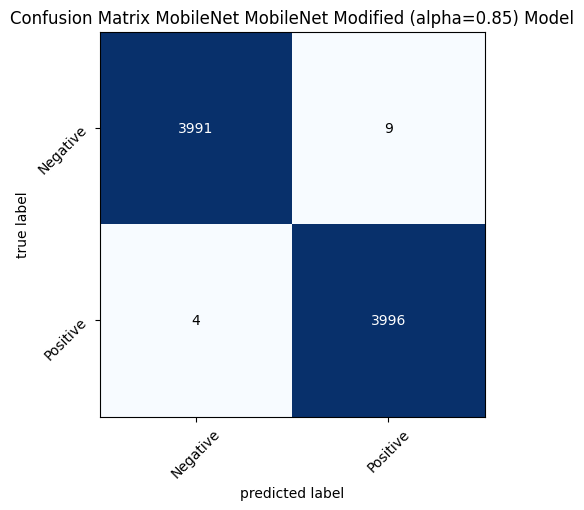

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    Negative     0.9990    0.9978    0.9984      4000
    Positive     0.9978    0.9990    0.9984      4000

    accuracy                         0.9984      8000
   macro avg     0.9984    0.9984    0.9984      8000
weighted avg     0.9984    0.9984    0.9984      8000

==========================F1 Score====================
F1 Score :  0.9983749993652341


In [11]:
# Confusion Matrix and Classification Report
target_names = ['Negative', 'Positive']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNet_Modified3.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.title('Confusion Matrix MobileNet MobileNet Modified (alpha=0.85) Model')
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(val_generator.classes, y_pred, target_names=target_names, digits=4))

# F1 Score
print("==========================F1 Score====================")
f1_MobileNet_Modified3 = f1_score(val_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_MobileNet_Modified3)

# MobileNet Modified (alpha=0.80) Model Validation

In [12]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNet_Modified4 = MobileNet_Modified4.evaluate(val_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNet_Modified4[1]*100))
print("Loss: %.6f%%" % (scores_MobileNet_Modified4[0]*100))

==========================Evaluate Model====================
250/250 [==============================] - 11s 40ms/step - loss: 0.0093 - accuracy: 0.9985
Accuracy: 99.849999%
Loss: 0.932089%


==========================Confusion Matrix====================
250/250 [==============================] - 12s 44ms/step


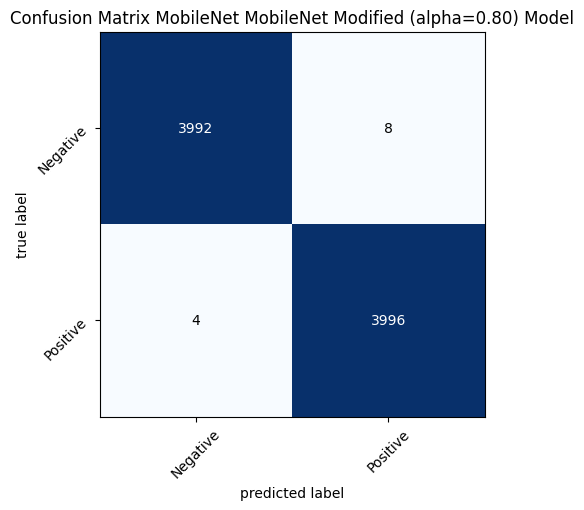

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    Negative     0.9990    0.9980    0.9985      4000
    Positive     0.9980    0.9990    0.9985      4000

    accuracy                         0.9985      8000
   macro avg     0.9985    0.9985    0.9985      8000
weighted avg     0.9985    0.9985    0.9985      8000

==========================F1 Score====================
F1 Score :  0.9984999996249999


In [13]:
# Confusion Matrix and Classification Report
target_names = ['Negative', 'Positive']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNet_Modified4.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.title('Confusion Matrix MobileNet MobileNet Modified (alpha=0.80) Model')
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(val_generator.classes, y_pred, target_names=target_names, digits=4))

# F1 Score
print("==========================F1 Score====================")
f1_MobileNet_Modified4 = f1_score(val_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_MobileNet_Modified4)

# MobileNet Modified (alpha=0.75) Model Validation

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNet_Modified5 = MobileNet_Modified5.evaluate(val_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNet_Modified5[1]*100))
print("Loss: %.6f%%" % (scores_MobileNet_Modified5[0]*100))

==========================Evaluate Model====================
250/250 [==============================] - 11s 41ms/step - loss: 0.0079 - accuracy: 0.9976
Accuracy: 99.762499%
Loss: 0.794464%


==========================Confusion Matrix====================
250/250 [==============================] - 11s 40ms/step


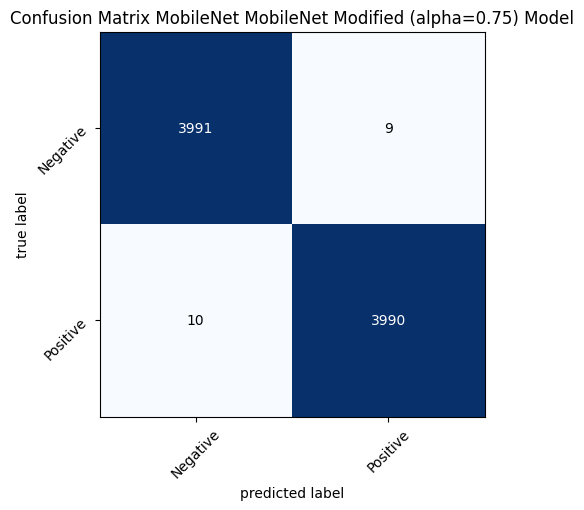

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    Negative     0.9975    0.9978    0.9976      4000
    Positive     0.9977    0.9975    0.9976      4000

    accuracy                         0.9976      8000
   macro avg     0.9976    0.9976    0.9976      8000
weighted avg     0.9976    0.9976    0.9976      8000

==========================F1 Score====================
F1 Score :  0.9976249999628906


In [15]:
# Confusion Matrix and Classification Report
target_names = ['Negative', 'Positive']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNet_Modified5.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.title('Confusion Matrix MobileNet MobileNet Modified (alpha=0.75) Model')
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(val_generator.classes, y_pred, target_names=target_names, digits=4))

# F1 Score
print("==========================F1 Score====================")
f1_MobileNet_Modified4 = f1_score(val_generator.classes, y_pred, average='weighted')
print('F1 Score : ', f1_MobileNet_Modified4)

# Wrap Up

In [16]:
# Make dictionary of all models
models = {'MobileNet_Basic': MobileNet_basic, 
          'MobileNet_Modified1': MobileNet_Modified1, 
          'MobileNet_Modified2': MobileNet_Modified2, 
          'MobileNet_Modified3': MobileNet_Modified3, 
          'MobileNet_Modified4': MobileNet_Modified4}

# Make dictionary of all accuracy scores
scores = {'MobileNet_Basic': scores_MobileNet_Basic[1], 
          'MobileNet_Modified1': scores_MobileNet_Modified1[1], 
          'MobileNet_Modified2': scores_MobileNet_Modified2[1], 
          'MobileNet_Modified3': scores_MobileNet_Modified3[1], 
          'MobileNet_Modified4': scores_MobileNet_Modified4[1]}

# Make dictionary of all loss scores
loss = {'MobileNet_Basic': scores_MobileNet_Basic[0], 
        'MobileNet_Modified1': scores_MobileNet_Modified1[0], 
        'MobileNet_Modified2': scores_MobileNet_Modified2[0], 
        'MobileNet_Modified3': scores_MobileNet_Modified3[0], 
        'MobileNet_Modified4': scores_MobileNet_Modified4[0]}

# Make dictionary of all F1 scores
f1 = {'MobileNet_Basic': f1_MobileNet_basic, 
      'MobileNet_Modified1': f1_MobileNet_Modified1, 
      'MobileNet_Modified2': f1_MobileNet_Modified2, 
      'MobileNet_Modified3': f1_MobileNet_Modified3, 
      'MobileNet_Modified4': f1_MobileNet_Modified4}

# Make dataframe of all models, accuracy, loss, and f1 score
df = pd.DataFrame(list(zip(models.keys(), scores.values(), loss.values(), f1.values())), 
               columns =['Model', 'Accuracy', 'Loss', 'F1 Score'])

# Sort dataframe by F1 Score
df.sort_values(by=['F1 Score'], inplace=True, ascending=False)

# Print dataframe
print(df)

                 Model  Accuracy      Loss  F1 Score
1  MobileNet_Modified1  0.998625  0.007755  0.998625
3  MobileNet_Modified3  0.998375  0.008358  0.998375
2  MobileNet_Modified2  0.998000  0.012242  0.998000
0      MobileNet_Basic  0.997875  0.011108  0.997875
4  MobileNet_Modified4  0.998500  0.009321  0.997625
